# Tester_branch에서 성능 확인 진행

In [1]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

''' 데이터 코드를 작성해주세요 '''

# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.

df = pd.DataFrame(wine.data, columns=wine.feature_names)

df['target'] = wine.target

feature = df.drop(['target'], axis = 1)
target = df['target']

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# DT 모델링 성능

Best Hyper-parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9444444444444444


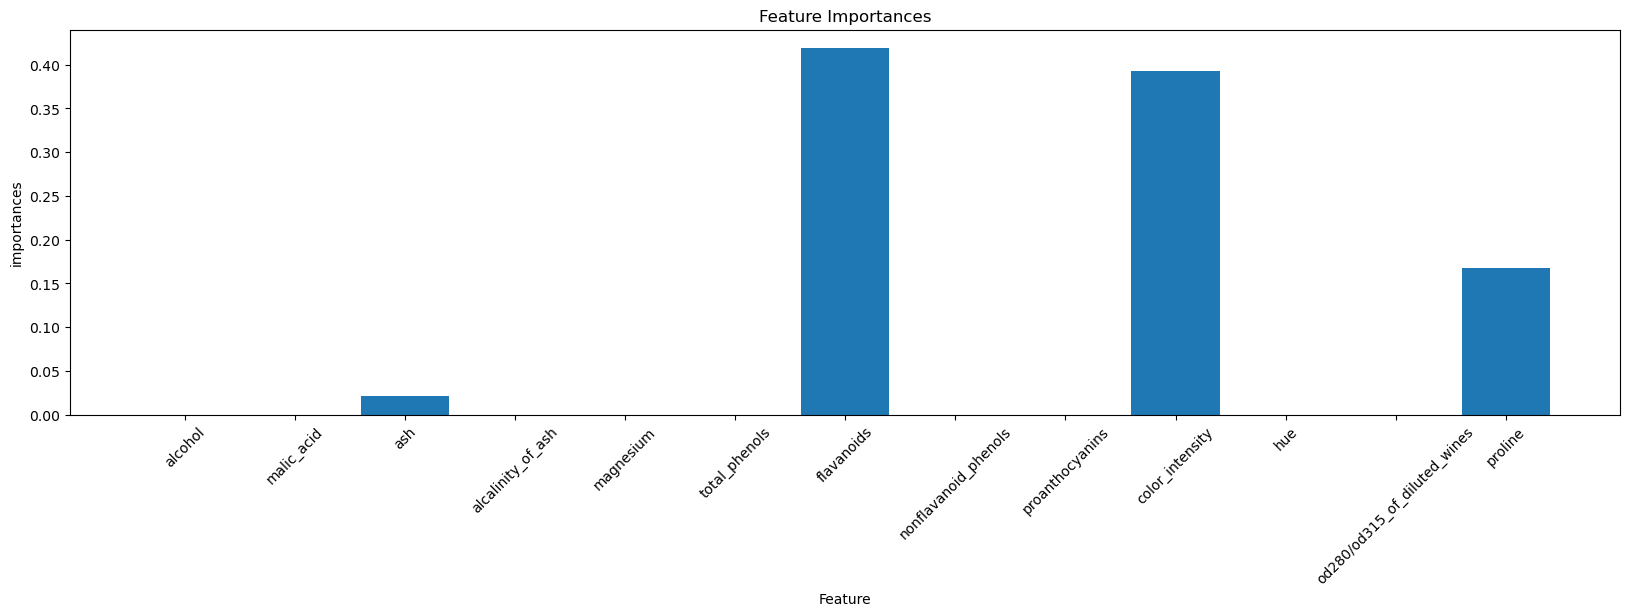

In [3]:
''' 코드를 작성해주세요 '''
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2,3,4, 5],
    "min_samples_split": [2,5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,  
    scoring="accuracy",  
    n_jobs=-1 
)

grid_search.fit(X_train, y_train) 


print("Best Hyper-parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_D = best_model.predict(X_test)
accuracy_D = accuracy_score(y_test, y_pred_D)
print(f"Best Score: {accuracy_D}")

feature_importance = best_model.feature_importances_
plt.figure(figsize=(20, 5))
plt.bar(feature.columns, feature_importance)
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('importances')
plt.show()

<img src="../참고이미지/Git/DT_Modeling.png" width="80%">

# XGB 모델링 성능

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 0.9722222222222222


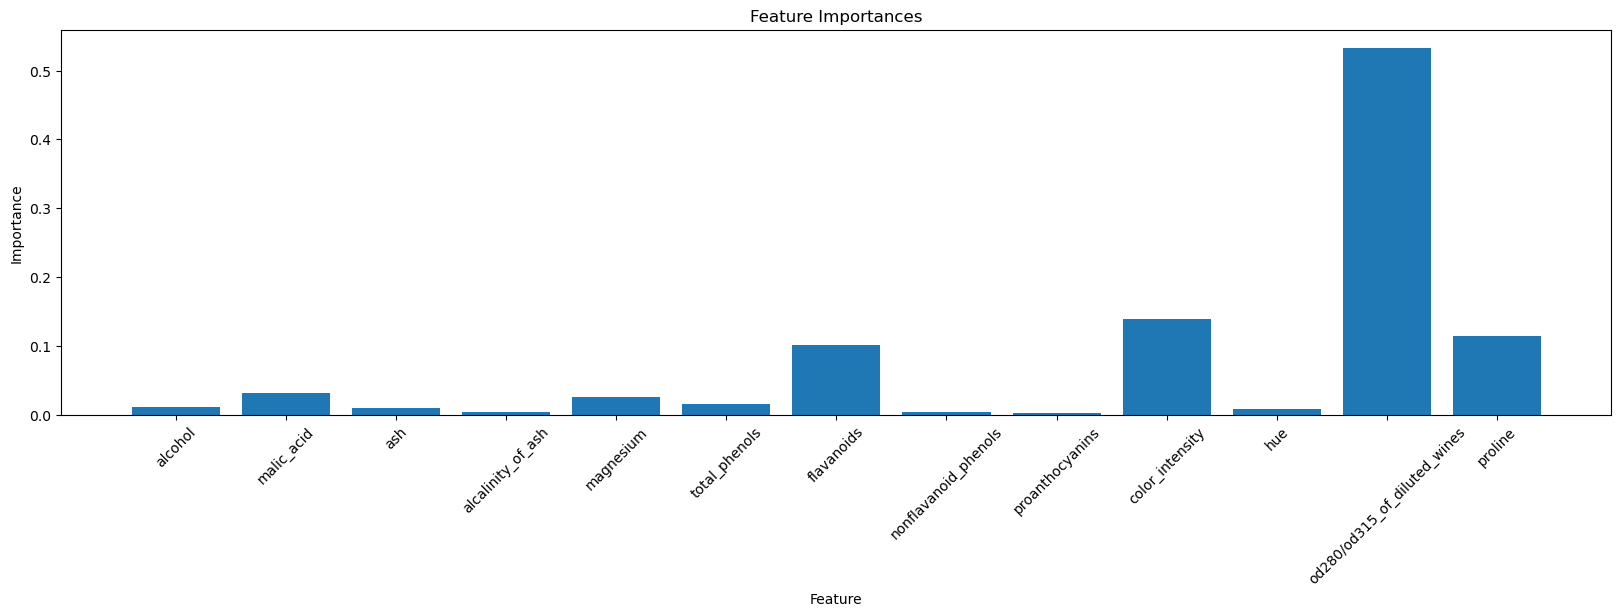

In [4]:
''' 코드를 작성해주세요 '''
param_grid = {
    "max_depth": [3, 5, 7, 9, 15],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [50, 100, 200, 300]
}

grid_search = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",  # Accuracy 기준
    n_jobs=-1  # 병렬 처리
)

grid_search.fit(X_train, y_train)  


print("Best parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred_X = best_model.predict(X_test)
accuracy_X = accuracy_score(y_test, y_pred_X)
print(f"Best Accuracy: {accuracy_X}")


feature_importance = best_model.feature_importances_
plt.figure(figsize=(20, 5))
plt.bar(feature.columns, feature_importance)
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


<img src="../참고이미지/Git/XGB_Modeling.png" width="80%">`

# 성능 비교 시각화

==================== DT 성능 확인 ====================
DT accuracy : 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

==================== XGB 성능 확인 ====================
XGB accuracy : 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



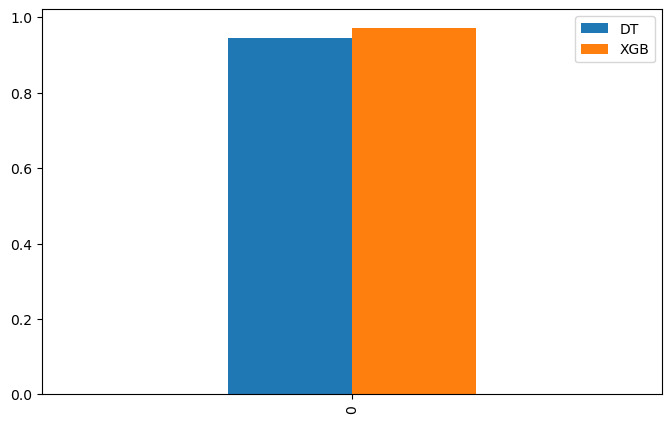

In [5]:
''' 코드를 작성해주세요 '''
print("=" * 20, "DT 성능 확인", "=" * 20)
print(f'DT accuracy : {accuracy_D}')
print(classification_report(y_test, (y_pred_X)))

print("=" * 20, "XGB 성능 확인", "=" * 20)
print(f'XGB accuracy : {accuracy_X}')
print(classification_report(y_test, (y_pred_D)))

x = 0  

plt.figure(figsize=(8,5))
plt.bar(x-0.2, accuracy_D, width=0.4, label="DT", align='center')  
plt.bar(x+0.2, accuracy_X, width=0.4, label="XGB", align='center')  


plt.xticks([0], rotation = 90)
plt.xlim(-1, 1)
plt.legend()
plt.show()


<img src="../참고이미지/Git/성능_비교_시각화.png" width="40%">